<a href="https://colab.research.google.com/github/inddivyansh/GenAI_GfG/blob/main/HelloAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip install tensorflow

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
y_train = to_categorical(y_train, num_classes= 10)

In [ ]:
y_test = to_categorical(y_test, num_classes= 10)

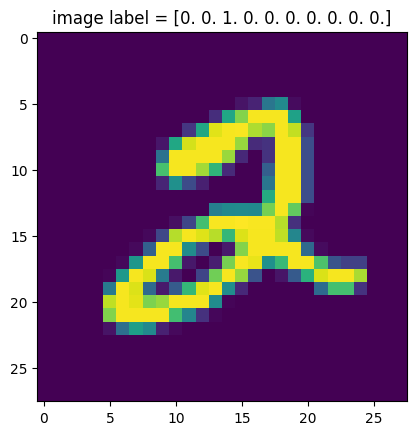

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[5])
plt.title(f"image label = {y_train[5]}")
plt.show()

In [ ]:
import numpy as np
np.unique(y_train)

array([0., 1.])

In [ ]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [ ]:
model = Sequential([
      Flatten(input_shape = (28,28)), # input layer neuron 784
      Dense(5, activation= 'relu'), #hidden layer 5 neuron relu activation fucntion
      Dense(10, activation='softmax') #output layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_18 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 5)              │         3,925 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 10)             │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,985 (15.57 KB)

 Trainable params: 3,985 (15.57 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5,batch_size=32, verbose=2)

Epoch 1/5
1875/1875 - 5s - 3ms/step - accuracy: 0.7345 - loss: 0.8614
Epoch 2/5
1875/1875 - 4s - 2ms/step - accuracy: 0.8646 - loss: 0.4750
Epoch 3/5
1875/1875 - 3s - 2ms/step - accuracy: 0.8765 - loss: 0.4355
Epoch 4/5
1875/1875 - 4s - 2ms/step - accuracy: 0.8838 - loss: 0.4137
Epoch 5/5
1875/1875 - 4s - 2ms/step - accuracy: 0.8867 - loss: 0.4002


In [ ]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8757 - loss: 0.4397


[0.3911118805408478, 0.8899000287055969]

In [ ]:
model.get_weights()
model.save('my_model.keras')